# Matando a DT

En este notebook voy a mostrar que DT no se beneficia de RFF y Nÿstroem mientras que otros modelos sí que lo hacen

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from time import time
import math

# Import datasets, classifiers and performance metrics
from sklearn import datasets
#from sklearn import pipeline
#from sklearn.kernel_approximation import (RBFSampler,
 #                            Nystroem)



## DT, Logit y SVM normales

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [3]:
digits = datasets.load_digits()

In [4]:
data = digits.data
target = digits.target
N = data.shape[0]
prop_train = 2 / 3
N_train = math.ceil(N * prop_train)
N_test = N - N_train

In [5]:
# Esto solo es una prueba
data /= 16
data -= data.mean(axis = 0)

In [6]:
data_train = data[:N_train]
data_test = data[N_train:]

target_train = target[:N_train]
target_test = target[N_train:]

In [7]:
dtc = DecisionTreeClassifier()
lg = LogisticRegression(C = 1, multi_class = 'multinomial', 
                           solver = 'lbfgs')
lsvc = LinearSVC()

In [8]:
dtc.fit(data_train, target_train)
lg.fit(data_train, target_train)
lsvc.fit(data_train, target_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [9]:
dtc_train_score = dtc.score(data_train, target_train)
dtc_test_score = dtc.score(data_test, target_test)

lg_train_score = lg.score(data_train, target_train)
lg_test_score = lg.score(data_test, target_test)

lsvc_train_score = lsvc.score(data_train, target_train)
lsvc_test_score = lsvc.score(data_test, target_test)

In [10]:
dtc_train_score, dtc_test_score

(1.0, 0.7729549248747913)

In [11]:
lg_train_score, lg_test_score

(0.991652754590985, 0.9215358931552587)

In [12]:
lsvc_train_score, lsvc_test_score

(0.991652754590985, 0.9131886477462438)

### Conclusiones

- Los tres modelos generalizan por sí solos
- De peor a mejor, el orden es:
    1. Decision Tree
    2. SVM Lineal
    3. Regresión Logística

## DT, Logit y SVM con RFF

In [13]:
from sklearn.kernel_approximation import RBFSampler
from sklearn import pipeline

In [14]:
feature_map_fourier = RBFSampler(gamma=.2, random_state=1)

In [15]:
dtc_rff = pipeline.Pipeline([("feature_map", feature_map_fourier),
                                        ("dtc", DecisionTreeClassifier())])

lg_rff = pipeline.Pipeline([("feature_map", feature_map_fourier),
                                        ("lg", LogisticRegression(C = 1, multi_class = 'multinomial', 
                           solver = 'lbfgs'))])

lsvc_rff = pipeline.Pipeline([("feature_map", feature_map_fourier),
                             ("lsvc", LinearSVC())])

In [16]:
sample_sizes = 30 * np.arange(1, 50)

dtc_scores = []
lg_scores = []
lsvc_scores = []

for D in sample_sizes:
    dtc_rff.set_params(feature_map__n_components=D)
    lg_rff.set_params(feature_map__n_components=D)
    lsvc_rff.set_params(feature_map__n_components=D)
    
    dtc_rff.fit(data_train, target_train)
    lg_rff.fit(data_train, target_train)
    lsvc_rff.fit(data_train, target_train)
    
    dtc_rff_score = dtc_rff.score(data_test, target_test)
    lg_rff_score = lg_rff.score(data_test, target_test)
    lsvc_rff_score = lsvc_rff.score(data_test, target_test)
    
    dtc_scores.append(dtc_rff_score)
    lg_scores.append(lg_rff_score)
    lsvc_scores.append(lsvc_rff_score)

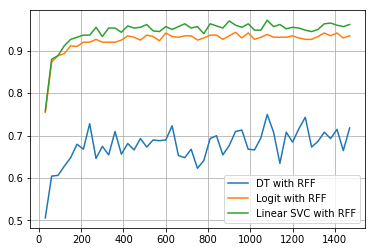

In [17]:
accuracy = plt.subplot(111)
accuracy.plot(sample_sizes, dtc_scores, label = "DT with RFF" )
accuracy.plot(sample_sizes, lg_scores, label = "Logit with RFF")
accuracy.plot(sample_sizes, lsvc_scores, label = "Linear SVC with RFF")
accuracy.grid(True)
accuracy.legend(loc='best')

## DT, Logit y SVM con Nÿstroem

In [18]:
from sklearn.kernel_approximation import Nystroem

In [19]:
feature_map_nystroem = Nystroem(gamma=.2, random_state=1)

In [20]:
dtc_nys = pipeline.Pipeline([("feature_map", feature_map_nystroem),
                                        ("dtc", DecisionTreeClassifier())])

lg_nys = pipeline.Pipeline([("feature_map", feature_map_nystroem),
                                        ("lg", LogisticRegression(C = 1, multi_class = 'multinomial', 
                           solver = 'lbfgs'))])

lsvc_nys = pipeline.Pipeline([("feature_map", feature_map_nystroem),
                             ("lsvc", LinearSVC())])

In [21]:
sample_sizes = 30 * np.arange(1, 30)

dtc_scores = []
lg_scores = []
lsvc_scores = []

for D in sample_sizes:
    dtc_nys.set_params(feature_map__n_components=D)
    lg_nys.set_params(feature_map__n_components=D)
    lsvc_nys.set_params(feature_map__n_components=D)
    
    dtc_nys.fit(data_train, target_train)
    lg_nys.fit(data_train, target_train)
    lsvc_nys.fit(data_train, target_train)
    
    dtc_nys_score = dtc_nys.score(data_test, target_test)
    lg_nys_score = lg_nys.score(data_test, target_test)
    lsvc_nys_score = lsvc_nys.score(data_test, target_test)
    
    dtc_scores.append(dtc_nys_score)
    lg_scores.append(lg_nys_score)
    lsvc_scores.append(lsvc_nys_score)

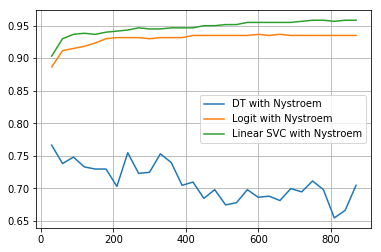

In [22]:
accuracy = plt.subplot(111)
accuracy.plot(sample_sizes, dtc_scores, label = "DT with Nystroem" )
accuracy.plot(sample_sizes, lg_scores, label = "Logit with Nystroem")
accuracy.plot(sample_sizes, lsvc_scores, label = "Linear SVC with Nystroem")
accuracy.grid(True)
accuracy.legend(loc='best')